In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
import pickle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
from sklearn.model_selection import RandomizedSearchCV

In [2]:
df = pd.read_csv('weather_forecast_data.csv')

In [3]:
df

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain
...,...,...,...,...,...,...
2495,21.791602,45.270902,11.807192,55.044682,1017.686181,no rain
2496,27.558479,46.481744,10.884915,39.715133,1008.590961,no rain
2497,28.108274,43.817178,2.897128,75.842952,999.119187,no rain
2498,14.789275,57.908105,2.374717,2.378743,1046.501875,no rain


In [4]:
df.head()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain


In [5]:
df.tail()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
2495,21.791602,45.270902,11.807192,55.044682,1017.686181,no rain
2496,27.558479,46.481744,10.884915,39.715133,1008.590961,no rain
2497,28.108274,43.817178,2.897128,75.842952,999.119187,no rain
2498,14.789275,57.908105,2.374717,2.378743,1046.501875,no rain
2499,26.554356,97.101517,18.563084,81.357508,1001.729176,no rain


In [6]:
df.Rain.value_counts()

Rain
no rain    2186
rain        314
Name: count, dtype: int64

In [7]:
label = LabelEncoder()

In [8]:
scaler = StandardScaler()

In [9]:
df.Rain = label.fit_transform(df.Rain)

In [10]:
df

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,1
1,27.879734,46.489704,5.952484,4.990053,992.614190,0
2,25.069084,83.072843,1.371992,14.855784,1007.231620,0
3,23.622080,74.367758,7.050551,67.255282,982.632013,1
4,20.591370,96.858822,4.643921,47.676444,980.825142,0
...,...,...,...,...,...,...
2495,21.791602,45.270902,11.807192,55.044682,1017.686181,0
2496,27.558479,46.481744,10.884915,39.715133,1008.590961,0
2497,28.108274,43.817178,2.897128,75.842952,999.119187,0
2498,14.789275,57.908105,2.374717,2.378743,1046.501875,0


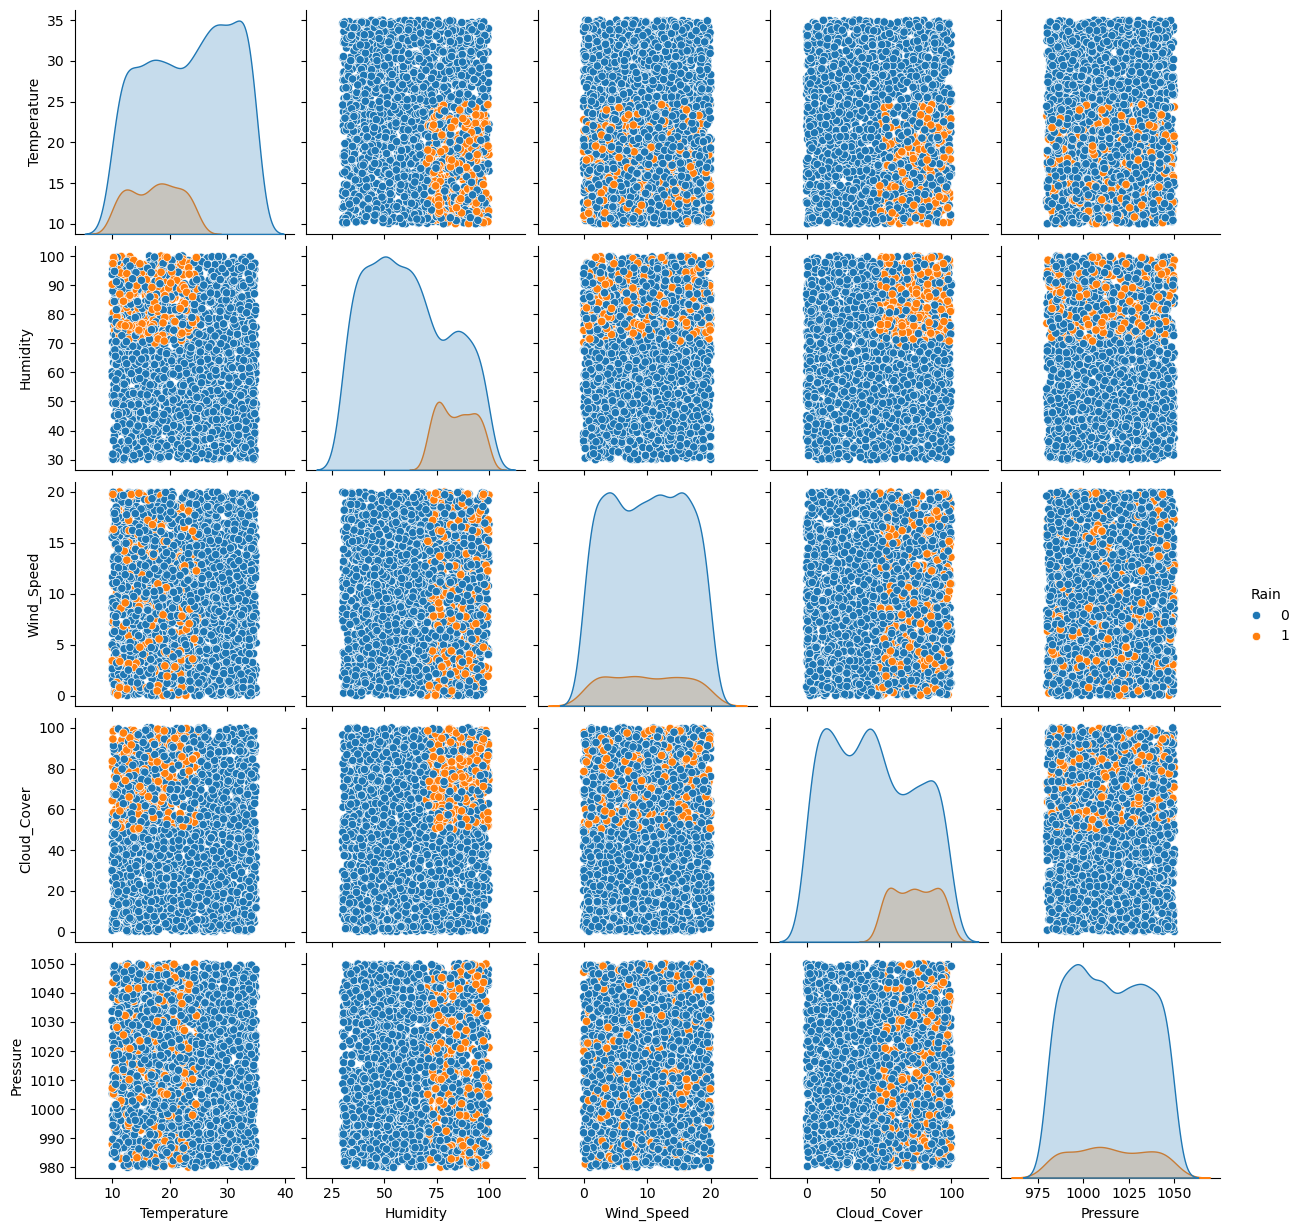

In [11]:
sb.pairplot(df,hue='Rain')

In [12]:
corr = df.corr()

<Axes: >

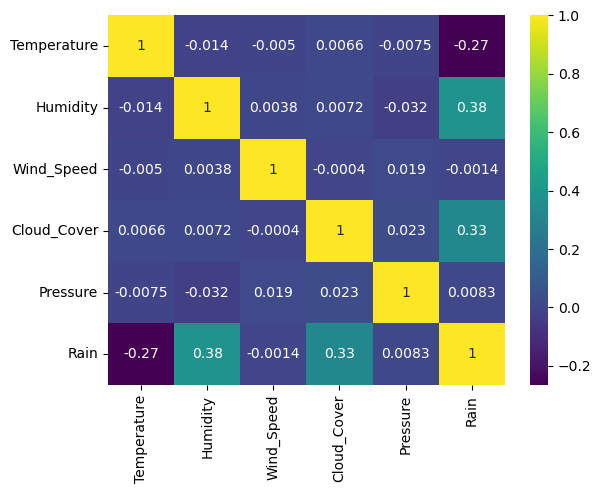

In [13]:
sb.heatmap(corr,annot=True,cmap='viridis')

<Axes: xlabel='Temperature', ylabel='Count'>

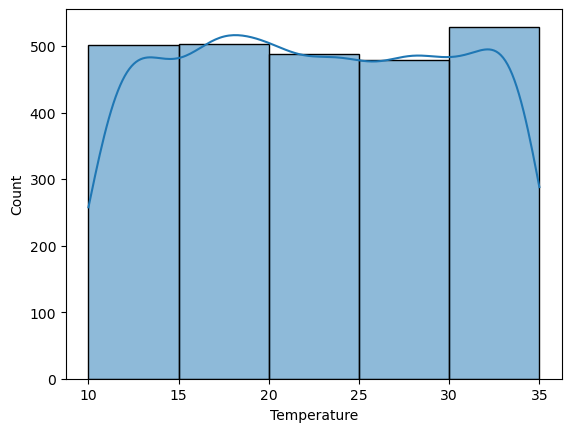

In [14]:
sb.histplot(data=df,bins=5,kde=True,x='Temperature',palette='pastel')

In [15]:
df.columns

Index(['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure',
       'Rain'],
      dtype='object')

In [16]:
smote = SMOTE()

In [17]:
x1 , y1 = smote.fit_resample(df[['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure']],df['Rain'])

In [18]:
df1 = pd.concat([x1,y1],axis=1)

In [19]:
df1.corr()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
Temperature,1.000000,-0.210289,-0.003929,-0.161358,0.004677,-0.448360
Humidity,-0.210289,1.000000,0.028438,0.248943,-0.004327,0.608929
Wind_Speed,-0.003929,0.028438,1.000000,0.007798,0.034399,-0.000055
Cloud_Cover,-0.161358,0.248943,0.007798,1.000000,0.034210,0.539152
Pressure,0.004677,-0.004327,0.034399,0.034210,1.000000,0.019919
Rain,-0.448360,0.608929,-0.000055,0.539152,0.019919,1.000000


In [20]:
df1['Rain'].value_counts()

Rain
1    2186
0    2186
Name: count, dtype: int64

In [21]:
df1.duplicated().sum()

0

In [22]:
x = df1.drop(['Rain'],axis=1).values

In [23]:
y = df1['Rain'].values

In [24]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.3)

In [27]:
svc = SVC(kernel='rbf')

In [28]:
svc.fit(x_train,y_train)

SVC()

In [29]:
y_pred = svc.predict(x_test)

In [30]:
y_pred

array([1, 1, 1, ..., 0, 1, 1])

In [31]:
acc = accuracy_score(y_test,y_pred)
con_mat = confusion_matrix(y_test,y_pred)
classification_rep = classification_report(y_test,y_pred)

In [32]:
print(f"accuracy of the model = {acc*100}")
print("confusion matrix : ")
print(con_mat)
print("Classification report of Model " )
print(classification_rep)

accuracy of the model = 97.86585365853658
confusion matrix : 
[[631  21]
 [  7 653]]
Classification report of Model 
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       652
           1       0.97      0.99      0.98       660

    accuracy                           0.98      1312
   macro avg       0.98      0.98      0.98      1312
weighted avg       0.98      0.98      0.98      1312



In [33]:
c_val = [100.0,10.0,1.0,0.1,0.01,0.001,0.0001]

In [34]:
kernel = ['linear','poly','rbf','sigmoid']

In [35]:
degree = [1,2,3,4,5,6,7,8,9,10]

In [36]:
gamma = ['scale','auto']

In [37]:
probability = [True,False]

In [38]:
decision_function_shape = ['ovr','ovo']

In [39]:
break_ties = [True,False]

In [40]:
class_weight = ['balanced']

In [41]:
cv = StratifiedKFold()

In [42]:
param = dict(C=c_val,kernel=kernel,degree=degree,gamma=gamma,probability=probability,class_weight=class_weight,decision_function_shape = decision_function_shape,break_ties=break_ties)

In [43]:
param

{'C': [100.0, 10.0, 1.0, 0.1, 0.01, 0.001, 0.0001],
 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
 'degree': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'gamma': ['scale', 'auto'],
 'probability': [True, False],
 'class_weight': ['balanced'],
 'decision_function_shape': ['ovr', 'ovo'],
 'break_ties': [True, False]}

In [45]:
grid = RandomizedSearchCV(svc,param_distributions=param,cv=cv,n_jobs=-1,scoring='accuracy')

In [25]:
x_train = scaler.fit_transform(x_train)

In [26]:
x_test = scaler.transform(x_test)

In [46]:
grid.fit(x_train,y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': [100.0, 10.0, 1.0, 0.1, 0.01,
                                              0.001, 0.0001],
                                        'break_ties': [True, False],
                                        'class_weight': ['balanced'],
                                        'decision_function_shape': ['ovr',
                                                                    'ovo'],
                                        'degree': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid'],
                                        'probability': [True, False]},
                   scoring='accuracy')

In [47]:
grid.best_score_

0.9888888888888889